<h1><strong><u>Final Clickbait Model</u></strong></h1>

In [ ]:
%%capture
%run KNNClickbaitClassifier.ipynb
%run MLPClickbaitClassifier.ipynb
%run NBClickbaitClassifier.ipynb

In [2]:
knn_classifier = knn_clickbait_classifier()
mlp_classifier = mlp_clickbait_classifier()
nb_classifier = nb_clickbait_classifier()

print(knn_classifier, mlp_classifier, nb_classifier)

Pipeline(steps=[('vect',
                 TfidfVectorizer(token_pattern=None,
                                 tokenizer=<function custom_tokenizer at 0x1657bfa60>)),
                ('clf', KNeighborsClassifier(n_neighbors=23))]) Pipeline(steps=[('vect',
                 TfidfVectorizer(token_pattern=None,
                                 tokenizer=<function custom_tokenizer at 0x165a59bc0>)),
                ('clf',
                 MLPClassifier(alpha=1, hidden_layer_sizes=(16,),
                               max_iter=1000))]) Pipeline(steps=[('vect',
                 TfidfVectorizer(token_pattern=None,
                                 tokenizer=<function custom_tokenizer at 0x30ec56660>)),
                ('clf', BernoulliNB(alpha=1))])


<h2><strong><u>Final Model Selection</u></strong></h2>

<h3><strong><u>Cross-Validation Test</u></strong></h3>

In [3]:
pipeline = Pipeline(
    [
        ("clf", None)
    ]
)
param_grid = {"clf": [knn_classifier, mlp_classifier, nb_classifier]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters:  {'clf': Pipeline(steps=[('vect',
                 TfidfVectorizer(token_pattern=None,
                                 tokenizer=<function custom_tokenizer at 0x30ec56660>)),
                ('clf', BernoulliNB(alpha=1))])}


<h2><strong><u>Final Model Testing</u></strong></h2>

<h3><strong><u>Performance Metrics</u></strong></h3>

In [8]:
for key, value in clf_metrics.items():
    print(f"{key}")
    log_test_values = cross_val_score(knn_classifier, X_test, y=y_test, scoring=value, cv=5)
    print(f"CV Test Scores: ", log_test_values)
    np_log_test_values = np.array(log_test_values)
    average = np.mean(np_log_test_values)
    stDev = np.std(np_log_test_values)
    print(f"Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV Test Scores:  [0.925      0.9        0.91328125 0.9140625  0.91875   ]
Average and Standard Error:  0.91% ± 0.82% 

Precision
CV Test Scores:  [0.9004329  0.87303852 0.89244186 0.8937409  0.88575458]
Average and Standard Error:  0.89% ± 0.93% 

Recall
CV Test Scores:  [0.95852535 0.94009217 0.94316436 0.94316436 0.96466974]
Average and Standard Error:  0.95% ± 0.98% 

Negative Predictive Value
CV Test Scores:  [0.95400341 0.93264249 0.9375     0.9376054  0.95971979]
Average and Standard Error:  0.94% ± 1.06% 

Specificity
CV Test Scores:  [0.89030207 0.85850556 0.88235294 0.88394277 0.87122417]
Average and Standard Error:  0.88% ± 1.12% 



Text(0.5, 1.0, 'Final Clickbait Classifier: Confusion Matrix (Test)')

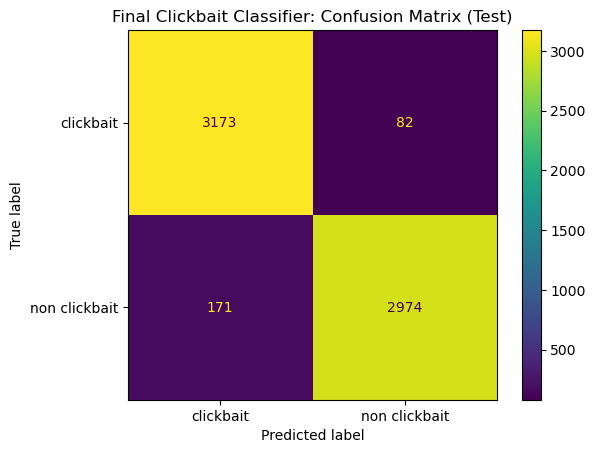

In [5]:
#Testing Confusion Matrix
test_predictions = best_model.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, test_predictions, labels=['clickbait', 'non clickbait'])
disp.ax_.set_title("Final Clickbait Classifier: Confusion Matrix (Test)")

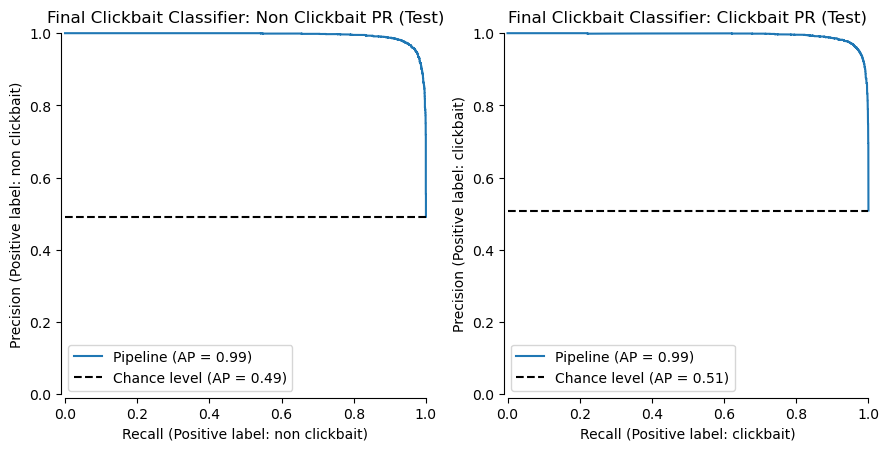

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(9, 9))
axs = axs.flatten()
count = 0
for label in test_labels:
    disp = PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, ax=axs[count], pos_label=label, plot_chance_level=True, despine=True)
    disp.ax_.set_title(f"Final Clickbait Classifier: {label.title()} PR (Test)")
    count += 1

plt.tight_layout()   
plt.show()

<h2><strong><u>Final Thoughts</u></strong></h2>
After running the test metrics on the final selected model, I recorded good results for the tests. I found that the final model is good at distinguishing both the positive and the negative class from each other. Considering the results of the experiment, I believe this model can used for clickbait classification.